In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
import os

In [2]:
#Se cargan los datos
data = np.load("chestmnist_128.npz")

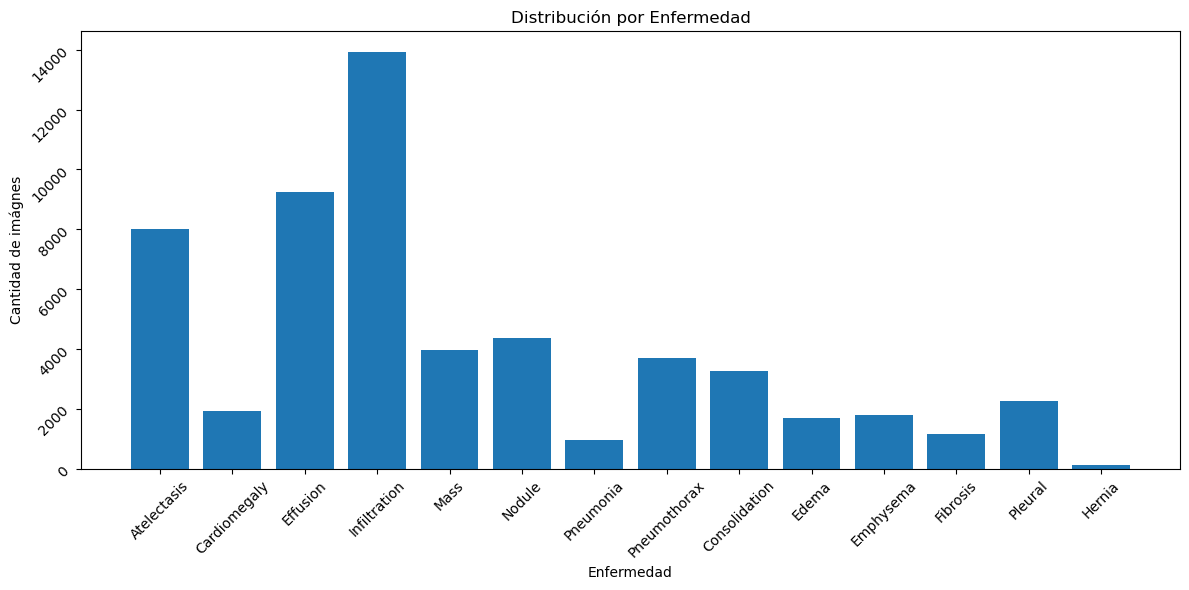

In [18]:
#Definir nombre de las enfermedades
etiquetas = [
    "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration",
    "Mass", "Nodule", "Pneumonia", "Pneumothorax",
    "Consolidation", "Edema", "Emphysema", "Fibrosis",
    "Pleural", "Hernia"
]

#Cantidad de imagenes por enfermedad
etiquetas_conteo_train = data['train_labels'].sum(axis=0)


#Histograma
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.bar(etiquetas, etiquetas_conteo_train)
ax.set_title('Distribución por Enfermedad')
ax.set_xlabel('Enfermedad')
ax.set_ylabel('Cantidad de imágnes')
ax.tick_params(labelrotation=45)

# Graficar
plt.tight_layout()
plt.show()

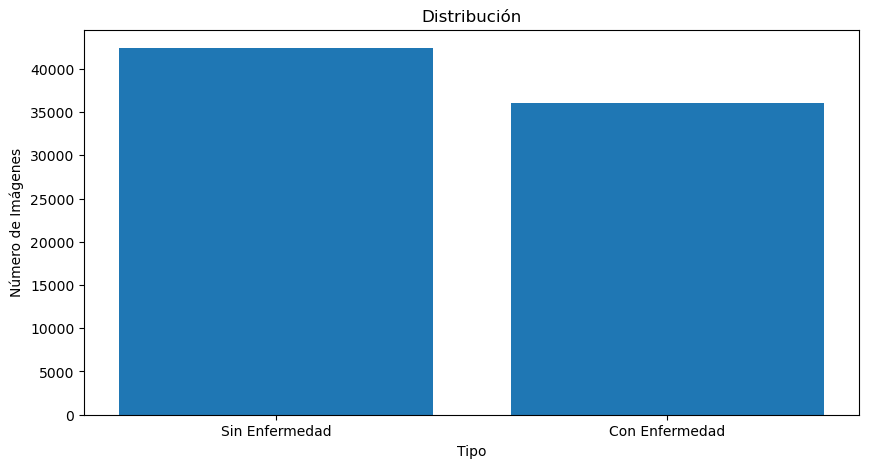

In [22]:
#Función para separar la cantidad de imágenes con y sin enfermedad 
def clasificacion_enfermos(etiquetas):
    # Suma las label que hay por imagen, si es 0 no tiene enfermedades.
    con_enfermedad = np.sum(etiquetas.sum(axis=1) > 0)
    sin_enfermedad = etiquetas.shape[0] - con_enfermedad  # Total minus with disease gives no disease
    return sin_enfermedad, con_enfermedad

#Calcular la cantidad
sin_enfermedad, con_enfermedad = clasificacion_enfermos(data['train_labels'])


#Graficos
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

classes = ['Sin Enfermedad', 'Con Enfermedad']

ax.bar(classes, [sin_enfermedad, con_enfermedad])
ax.set_title('Distribución')
ax.set_xlabel('Tipo')
ax.set_ylabel('Número de Imágenes')

plt.show()

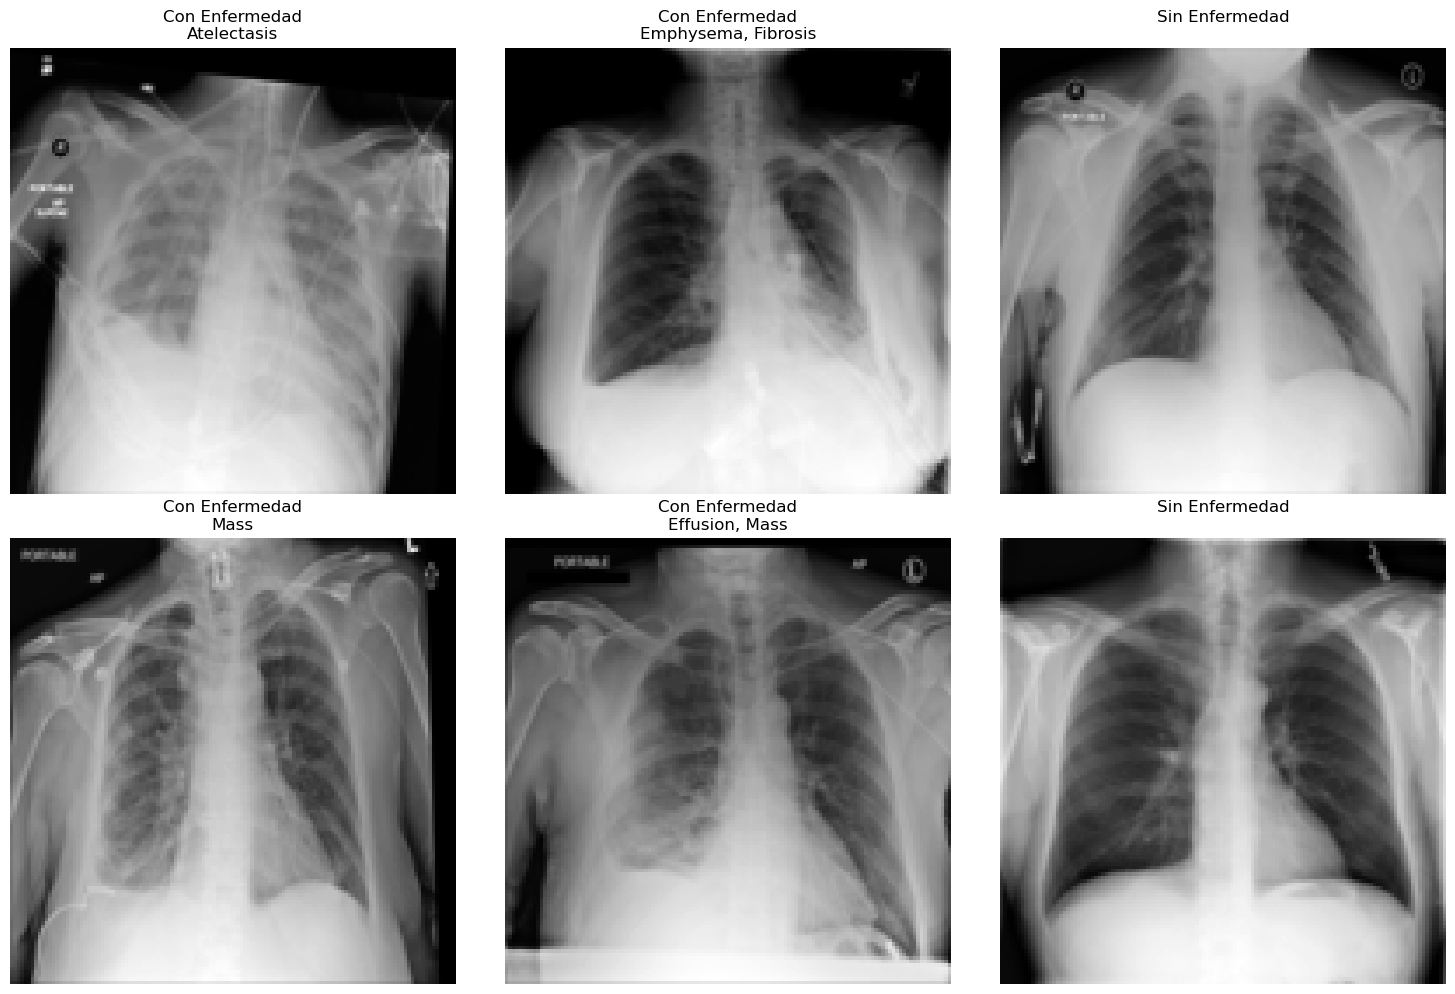

In [79]:
#Se selecionan algunas imágnes al azar
np.random.seed(2)
indices = np.random.choice(data['train_images'].shape[0], 6, replace=False)
imagenes = data['train_images'][indices]
etiqueta = data['train_labels'][indices]


etiquetas = [
    "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration",
    "Mass", "Nodule", "Pneumonia", "Pneumothorax",
    "Consolidation", "Edema", "Emphysema", "Fibrosis",
    "Pleural_Thickening", "Hernia"
]

#Se imprimen
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for ax, image, label in zip(axes.flatten(), imagenes, etiqueta):
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    disease_status = 'Con Enfermedad' if label.sum() > 0 else 'Sin Enfermedad'
    label_description = ', '.join([name for name, l in zip(etiquetas, label) if l])
    ax.set_title(f"{disease_status}\n{label_description}")

plt.tight_layout()
plt.show()

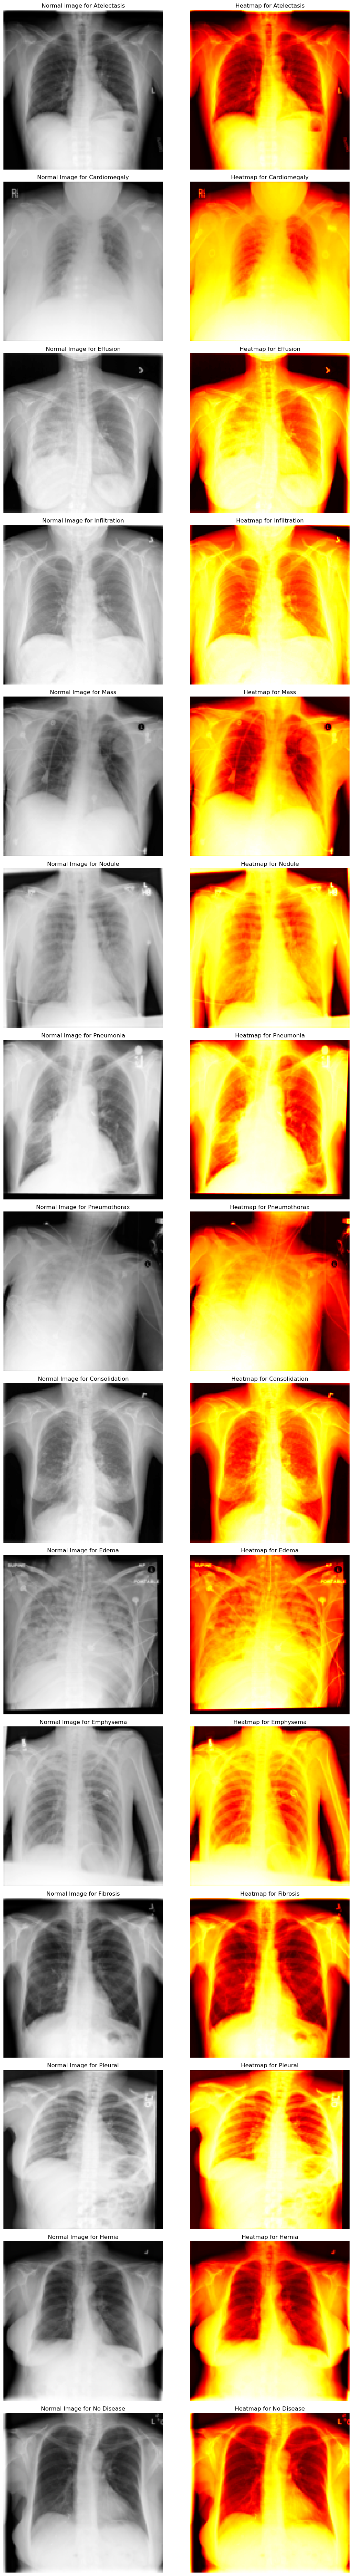

In [70]:
#Extraccion de una imagen por enfermedad
def find_images(labels):
    indices = []
    no_disease_index = None
    for i in range(labels.shape[1]):  
        for j in range(labels.shape[0]):  
            if labels[j, i] == 1 and labels[j].sum() == 1:  
                indices.append(j)
                break
    #Imagen sin enfermedad
    for j in range(labels.shape[0]):
        if labels[j].sum() == 0: 
            no_disease_index = j
            break
    return indices, no_disease_index

indices_selec, indice_sano = find_images(data['train_labels'])
imagenes_selec = data['train_images'][indices_selec]
imagen_sano = data['train_images'][indice_sano]

#Visualización
fig, axes = plt.subplots(len(indices_selec) + 1, 2, figsize=(12, 5 * (len(indices_selec) + 1)))
if len(indices_selec) == 1:
    axes = [axes]  

#Visualización
for ax, index, image in zip(axes[:-1], indices_selec, imagenes_selec):
    #Imagen normal
    ax[0].imshow(image, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title(f'Normal para {label_names[np.argmax(data["train_labels"][index])]}')

    #Heatmap
    ax[1].imshow(image, cmap='hot', interpolation='nearest')
    ax[1].axis('off')
    ax[1].set_title(f'Heatmap para {label_names[np.argmax(data["train_labels"][index])]}')

axes[-1][0].imshow(imagen_sano, cmap='gray')
axes[-1][0].axis('off')
axes[-1][0].set_title('Normal para Sin Enfermedad')

axes[-1][1].imshow(imagen_sano, cmap='hot', interpolation='nearest')
axes[-1][1].axis('off')
axes[-1][1].set_title('Heatmap para Sin Enfermedad')

plt.tight_layout()
plt.show()

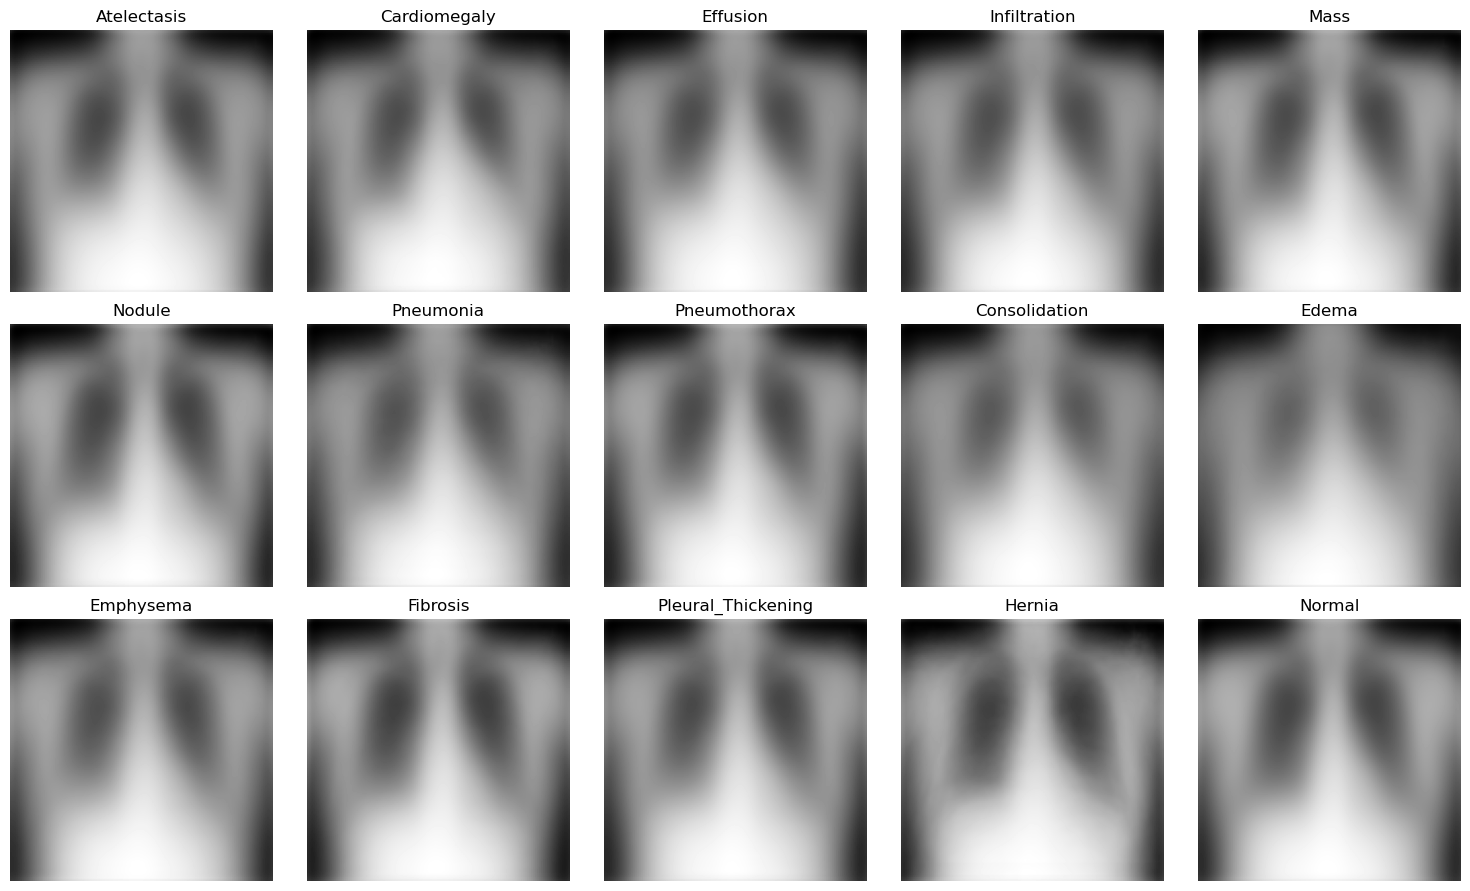

In [87]:
#Calculo del promedio
imagenes_por_etiqueta = {name: [] for name in etiquetas}
imagenes_por_etiqueta['Sin Enfermedad'] = []  

#Se clasifican las imágenes
for img, labels in zip(data['train_images'], data['train_labels']):
    if labels.sum() == 0:  
        imagenes_por_etiqueta['Sin Enfermedad'].append(img)
    else:
        for i, label in enumerate(labels):
            if label == 1:
                imagenes_por_etiqueta[etiquetas[i]].append(img)

#Se calcula la media por enfermedad
imagen_promedio = {}
for label, imgs in imagenes_por_etiqueta.items():
    if imgs:
        imagen_promedio[label] = np.mean(imgs, axis=0)

#Gráfico
fig, axes = plt.subplots(3,5, figsize=(15, 9)) 
axes = axes.flatten()
for ax, (label, mean_img) in zip(axes, imagen_promedio.items()):
    ax.imshow(mean_img, cmap='gray')
    ax.axis('off')
    ax.set_title(label)


for ax in axes[len(imagen_promedio):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

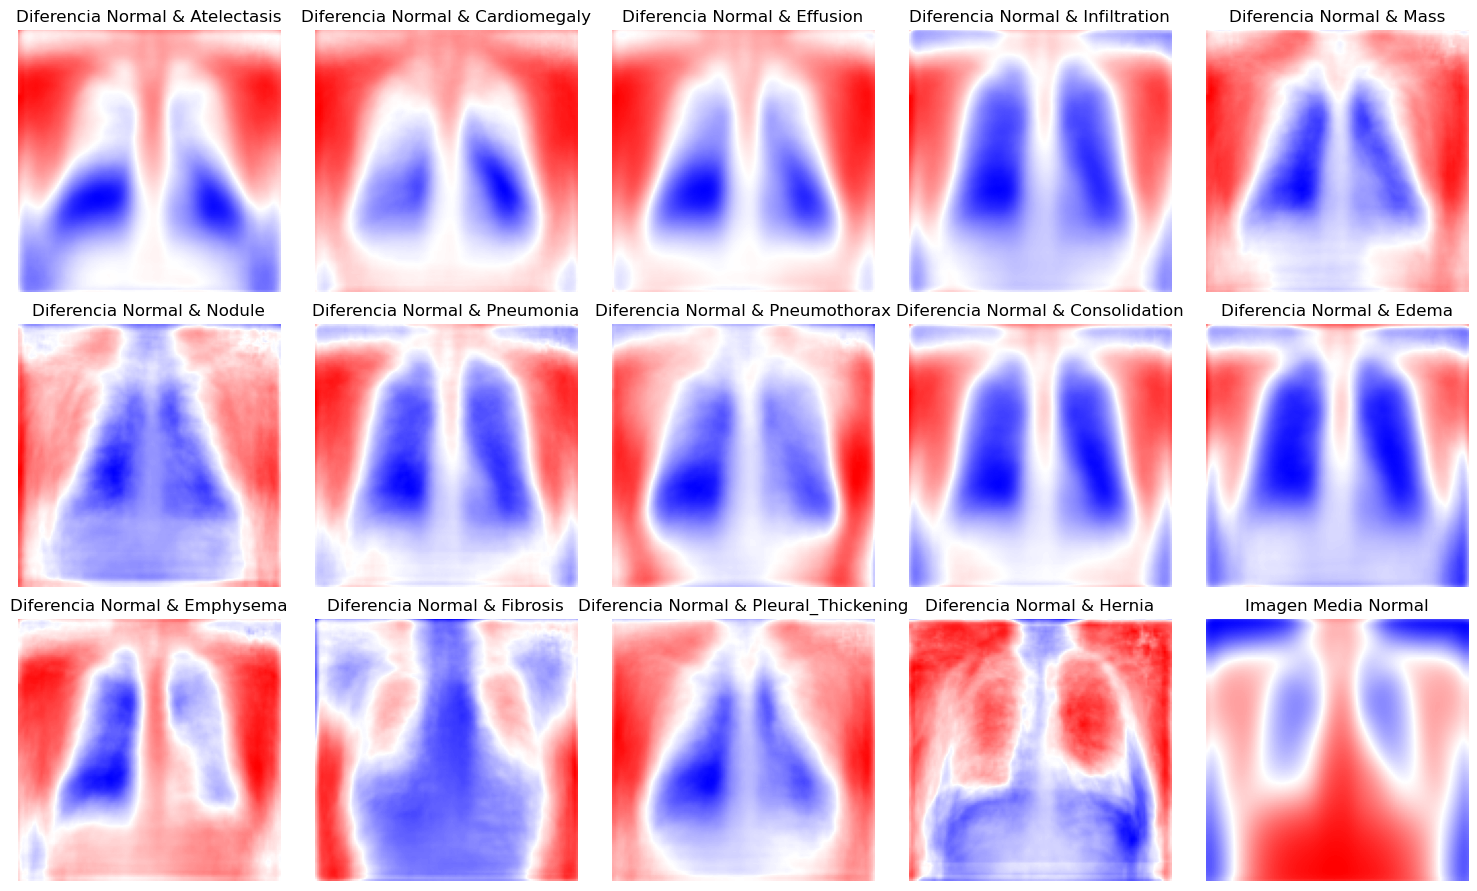

In [90]:
#Cálculo de la resta entre medias
media_normal = imagen_promedio['Sin Enfermedad']  


fig, axes = plt.subplots(3, 5, figsize=(15, 9))  
axes = axes.flatten()

for ax, (label, media_img) in zip(axes, imagen_promedio.items()):
    if label != 'Sin Enfermedad': 
        resta_media = media_normal - media_img
        ax.imshow(resta_media, cmap='bwr')
        ax.axis('off')
        ax.set_title(f'Diferencia Sano & {label}')
    else:
        ax.imshow(media_normal, cmap='bwr') 
        ax.axis('off')
        ax.set_title('Imagen Media Sin Enfermedad')


for ax in axes[len(imagen_promedio):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

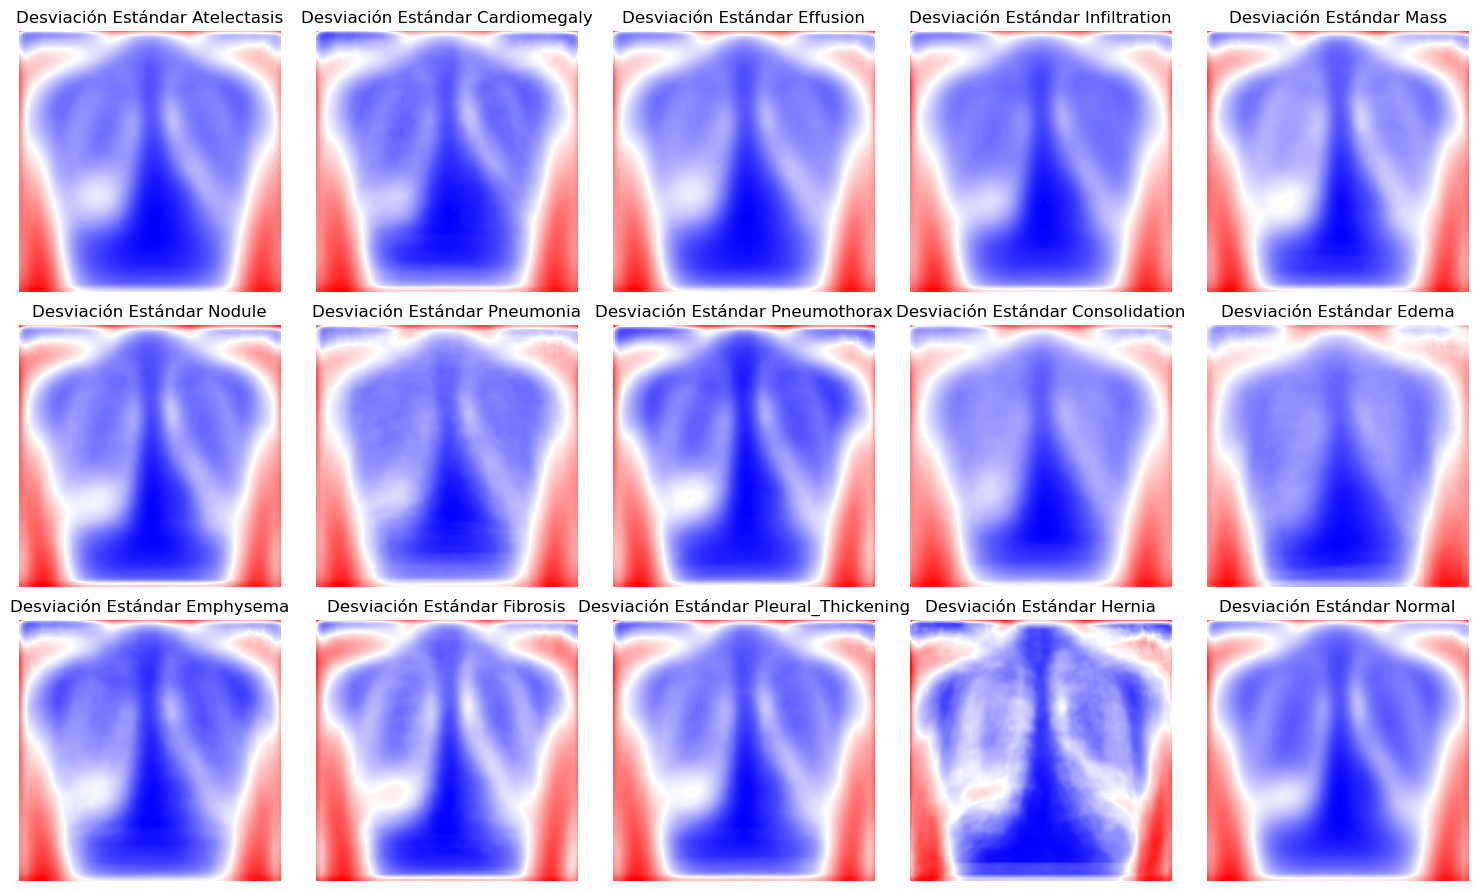

In [92]:
#Calculo de la desviación estándar
imagen_de = {}
for label, imgs in imagenes_por_etiqueta.items():
    if imgs:  # Ensure there are images to calculate on
        # Stack images into a single numpy array for vectorized computation
        imgs_array = np.stack(imgs)
        imagen_de[label] = np.std(imgs_array, axis=0)  

# Plotting the standard deviation images
fig, axes = plt.subplots(3, 5, figsize=(15, 9)) 
axes = axes.flatten()

for ax, (label, std_img) in zip(axes, imagen_de.items()):
    ax.imshow(std_img, cmap='bwr')  
    ax.axis('off')
    ax.set_title(f'Desviación Estándar {label}')


for ax in axes[len(imagen_de):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

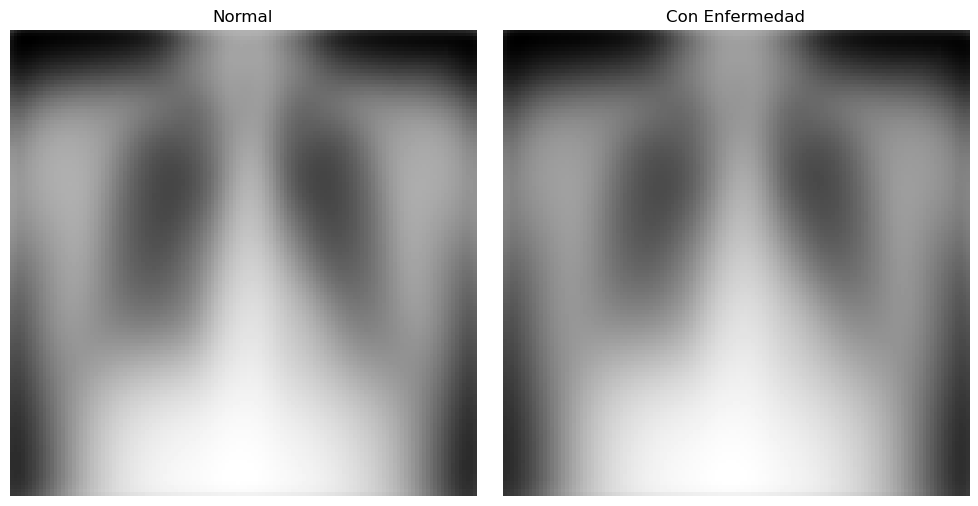

In [93]:
# Crear diccionario para almacenar imágenes según enfermo o no enfermo
imagenes_por_etiqueta= {'Sin Enfermedad': [], 'Con Enfermedad': []}

# Clasificar las imágenes
for img, labels in zip(data['train_images'], data['train_labels']):
    if labels.sum() == 0:
        imagenes_por_etiqueta['Sin Enfermedad'].append(img)
    else:
        imagenes_por_etiqueta['Con Enfermedad'].append(img)

# Calcular la media por clase
imagen_promedio = {}
for label, imgs in imagenes_por_etiqueta.items():
    if imgs:
        imagen_promedio[label] = np.mean(imgs, axis=0)

# Graficar
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for ax, (label, mean_img) in zip(axes, imagen_promedio.items()):
    ax.imshow(mean_img, cmap='gray')  
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

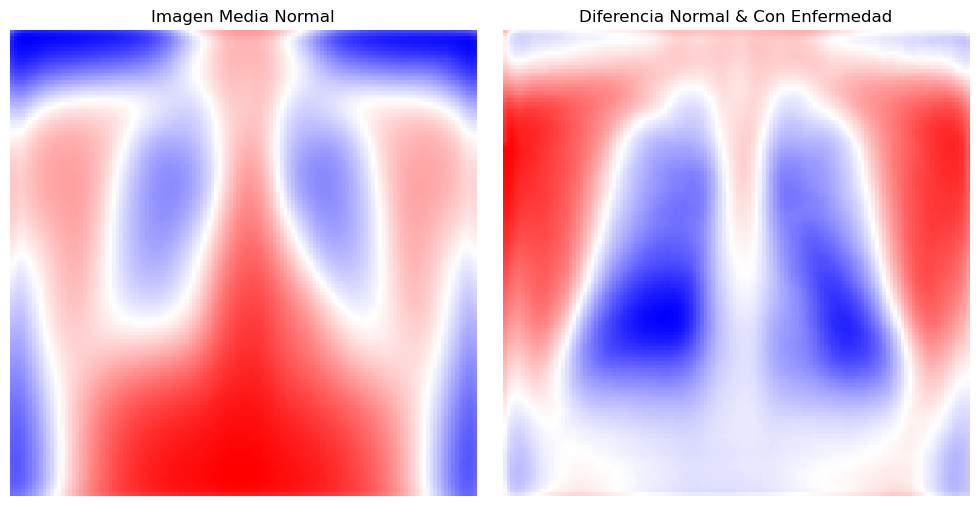

In [96]:
#Cálculo de la resta entre medias
media_normal = imagen_promedio['Sin Enfermedad']  


fig, axes = plt.subplots(1, 2, figsize=(10, 5))  
axes = axes.flatten()

for ax, (label, media_img) in zip(axes, imagen_promedio.items()):
    if label != 'Sin Enfermedad': 
        resta_media = media_normal - media_img
        ax.imshow(resta_media, cmap='bwr')
        ax.axis('off')
        ax.set_title(f'Diferencia Sin Enfermedad & {label}')
    else:
        ax.imshow(media_normal, cmap='bwr') 
        ax.axis('off')
        ax.set_title('Imagen Media Sin Enfermedad')


for ax in axes[len(imagen_promedio):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

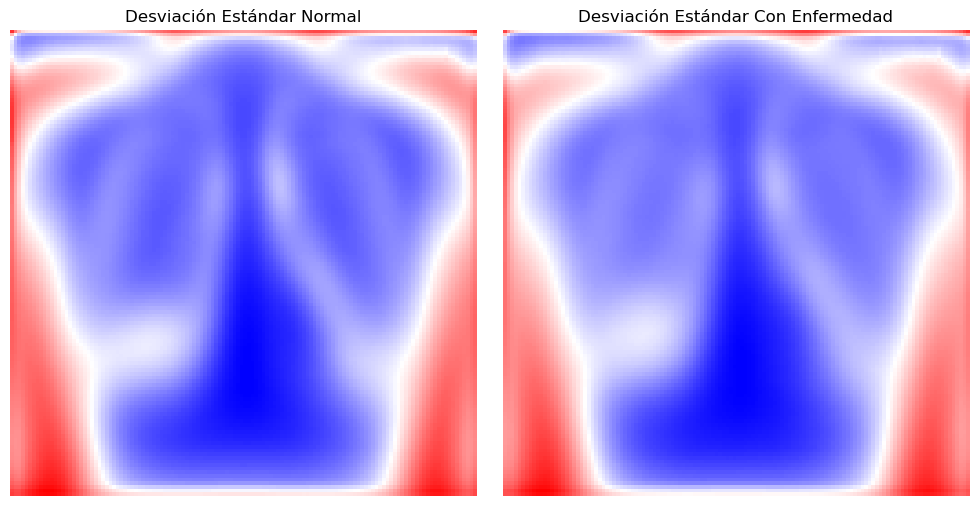

In [97]:
#Cálculo de la desviación estándar
imagen_de = {}
for label, imgs in imagenes_por_etiqueta.items():
    if imgs:  
        imgs_array = np.stack(imgs)
        imagen_de[label] = np.std(imgs_array, axis=0)  

fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 
axes = axes.flatten()

for ax, (label, std_img) in zip(axes, imagen_de.items()):
    ax.imshow(std_img, cmap='bwr')  
    ax.axis('off')
    ax.set_title(f'Desviación Estándar {label}')


for ax in axes[len(imagen_de):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

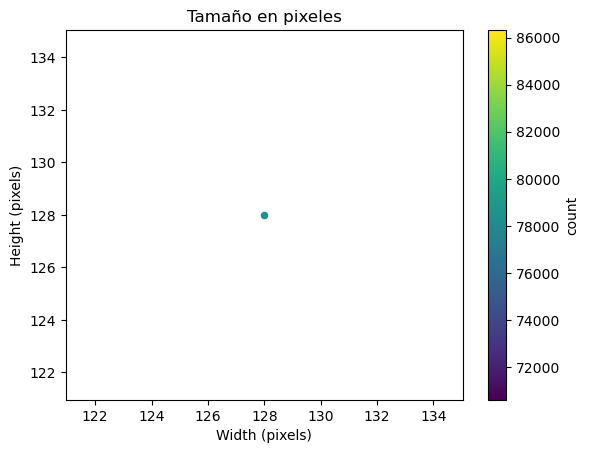

In [61]:
#Conteo de la cantidad de pixeles de las imágenes

#Obtener las dimensiones de las imágenes 
def tamaño(image):
    return image.shape[1], image.shape[0] 

dimensiones = []
for img in data['train_images']:
    dimensiones.append(tamaño(img))

dim_df = pd.DataFrame(dimensiones, columns=['width', 'height'])
tamaño = dim_df.groupby(['width', 'height']).size().reset_index().rename(columns={0: 'count'})

#Scatter plot para ver la distribución de tamaños de imágenes
sizes.plot.scatter(x='width', y='height', c='count', colormap='viridis', alpha=1)
plt.title('Tamaño en pixeles')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.show()